#### **1.准备工作：在Python中安装OpenCV包**
#### **2.导入必要的模块（OpenCV、numpy、matplotlib等）**
#### **3.使用OpenCV读取一张彩色图像，分析这张图像的分辨率、颜色通道等属性**
#### **4.使用matplotlib显示这张图像**

In [1]:
# 1
# cv2 是 OpenCV 库，用于图像和视频处理。
# matplotlib.pyplot 是用于绘图和可视化的库，常用于显示图像和绘制图表。
import cv2
import matplotlib.pyplot as plt
import numpy as np

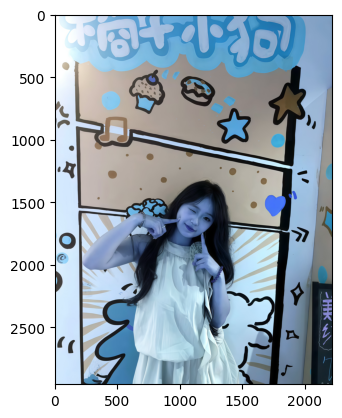

In [2]:
# 4
img_path = r"F:\Python\Data\quality_restoration_20250709003543265.jpg"
img = cv2.imread(img_path, 1)
plt.imshow(img)

#### **5.将这张图像从RGB颜色空间转为Lab颜色空间，并显示Lab各个颜色通道**

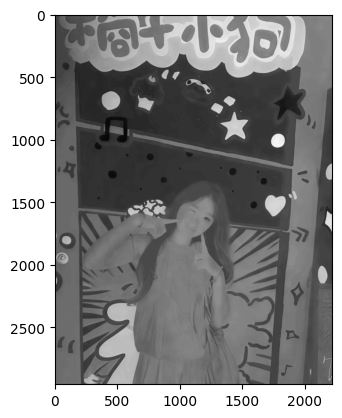

In [3]:
# 5
Lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
# 显示Lab各个颜色通道
plt.imshow(Lab_img[:, :, 0], cmap='gray')  # L通道
plt.imshow(Lab_img[:, :, 1], cmap='gray')  # a通道
plt.imshow(Lab_img[:, :, 2], cmap='gray')  # b通道

#### **6.将这张图像从RGB颜色空间转为HSV颜色空间，并显示HSV各个颜色通道**

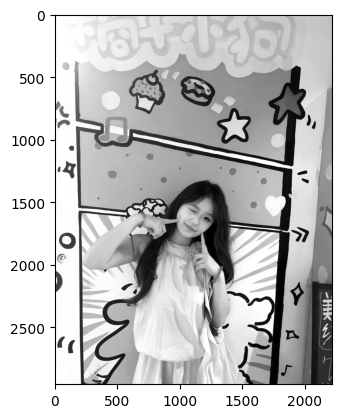

In [4]:
# 6
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 显示HSV各个颜色通道
plt.imshow(hsv_img[:, :, 0], cmap='gray')  # H通道
plt.imshow(hsv_img[:, :, 1], cmap='gray')  # S通道
plt.imshow(hsv_img[:, :, 2], cmap='gray')  # V通道

#### **7.尝试调节图像对比度，显示图像调节前后的结果**

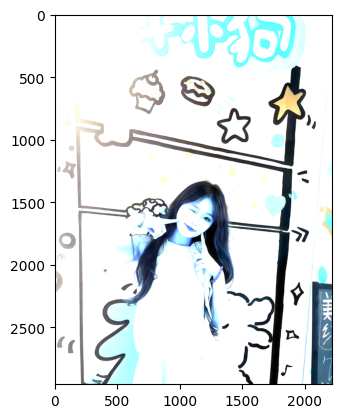

In [5]:
# 7
alpha = 3  # 对比度
adjusted = cv2.convertScaleAbs(img, alpha=alpha)
plt.imshow(adjusted)

#### **8.尝试调节图像亮度，显示图像调节前后的结果**

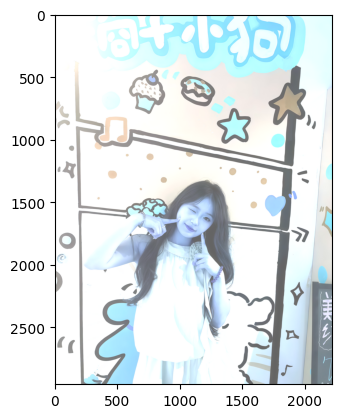

In [6]:
# 8
beta = 100
brightened = cv2.convertScaleAbs(img, beta=beta)
plt.imshow(brightened)

#### **9.尝试调节图像饱和度，显示图像调节前后的结果**

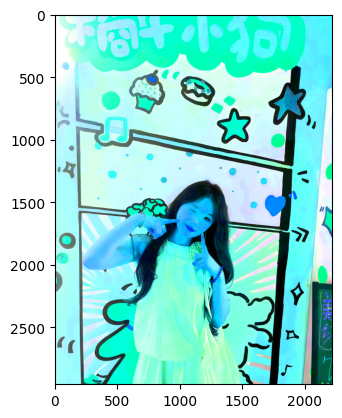

In [7]:
# 9
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv_img= cv2.multiply(hsv_img,2)  # 增加饱和度
saturated = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
plt.imshow(saturated)

#### **10.对图像进行伽马变换，显示图像变换前后的结果**

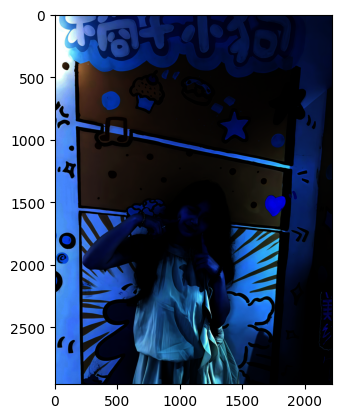

In [8]:
# 10
gamma = 7  # 伽马值
gamma_corrected = cv2.LUT(img, np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8"))
plt.imshow(gamma_corrected)